In [38]:
import pandas as pd
import seaborn as sns
from numpy import load
import pickle
import numpy as np

In [39]:
df = pd.read_table( 
    '../../data/external/BERPublicSearch/BERPublicsearch.txt'
    ,usecols=[  'CountyName'
              , 'DwellingTypeDescr'
              , 'Year_of_Construction'
              , 'GroundFloorArea(sq m)'
              , 'EnergyRating'
              , 'TotalDeliveredEnergy'
              , 'InsulationType'
              , 'InsulationThickness'
              , 'MainSpaceHeatingFuel'
              , 'MainWaterHeatingFuel'
              , 'NoOfSidesSheltered'
              , 'StructureType'
              , 'VentilationMethod']
    ,encoding = 'Latin-1'
)

/var/folders/f2/h4nbcthd4cld5t6fzd1x3jg40000gn/T/ipykernel_5006/2474422705.py:1: DtypeWarning: Columns (71) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(


In [40]:
df.head()

,CountyName,DwellingTypeDescr,Year_of_Construction,EnergyRating,GroundFloorArea(sq m),MainSpaceHeatingFuel,MainWaterHeatingFuel,VentilationMethod,StructureType,NoOfSidesSheltered,InsulationType,InsulationThickness,TotalDeliveredEnergy
0,Co. Donegal,Detached house,1997,C2,171.19,Heating Oil,Heating Oil,Natural vent.,Masonry,1.0,Factory Insulated,20.0,25474.522
1,Co. Kildare,Detached house,2010,B3,242.93,Heating Oil,Heating Oil,Natural vent.,Masonry,2.0,Factory Insulated,50.0,27654.474
2,Co. Dublin,Semi-detached house,1999,C3,99.38,Mains Gas,Mains Gas,Natural vent.,Masonry,3.0,Loose Jacket,20.0,17000.038
3,Dublin 11,Semi-detached house,1965,C2,138.41,Mains Gas,Mains Gas,Natural vent.,Masonry,2.0,NaN,NaN,22708.484
4,Dublin 22,Semi-detached house,1985,D2,127.16,Mains Gas,Mains Gas,Natural vent.,Masonry,2.0,Loose Jacket,100.0,28182.863


In [41]:
df.isna().sum()

CountyName                    0
DwellingTypeDescr             0
Year_of_Construction          0
EnergyRating                  0
GroundFloorArea(sq m)         0
MainSpaceHeatingFuel      15648
MainWaterHeatingFuel      15648
VentilationMethod          3613
StructureType              3613
NoOfSidesSheltered         3613
InsulationType           232787
InsulationThickness      232787
TotalDeliveredEnergy     598110
dtype: int64

In [42]:
round(df.isna().mean() * 100, 2)

CountyName                0.00
DwellingTypeDescr         0.00
Year_of_Construction      0.00
EnergyRating              0.00
GroundFloorArea(sq m)     0.00
MainSpaceHeatingFuel      1.50
MainWaterHeatingFuel      1.50
VentilationMethod         0.35
StructureType             0.35
NoOfSidesSheltered        0.35
InsulationType           22.30
InsulationThickness      22.30
TotalDeliveredEnergy     57.30
dtype: float64

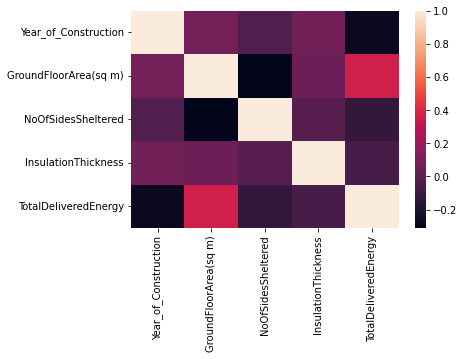

In [43]:
sns.heatmap(df.corr());

In [57]:
df.corr() < -0.7

,Year_of_Construction,GroundFloorArea(sq m),NoOfSidesSheltered,InsulationThickness,TotalDeliveredEnergy
Year_of_Construction,False,False,False,False,False
GroundFloorArea(sq m),False,False,False,False,False
NoOfSidesSheltered,False,False,False,False,False
InsulationThickness,False,False,False,False,False
TotalDeliveredEnergy,False,False,False,False,False


In [45]:
df_impute = pd.read_csv('../../data/processed/Define/seai_missingforest_data_imputed.csv')

In [46]:
df_impute

,CountyName,DwellingTypeDescr,YearofConstruction,GroundFloorArea(sq m),MainSpaceHeatingFuel,MainWaterHeatingFuel,VentilationMethod,StructureType,NoOfSidesSheltered,InsulationType,InsulationThickness,TotalDeliveredEnergy,EnergyRating
0,Donegal,Detached house,1997,171.190,Heating Oil,Heating Oil,Natural vent.,Masonry,one,Factory Insulated,20.000000,25474.522000,C2
1,Kildare,Detached house,2010,242.930,Heating Oil,Heating Oil,Natural vent.,Masonry,two,Factory Insulated,50.000000,27654.474000,B3
2,Dublin,Semi-detached house,1999,99.380,Mains Gas,Mains Gas,Natural vent.,Masonry,three,Loose Jacket,20.000000,17000.038000,C3
3,Dublin,Semi-detached house,1965,138.410,Mains Gas,Mains Gas,Natural vent.,Masonry,two,Factory Insulated,39.350000,22708.484000,C2
4,Dublin,Semi-detached house,1985,127.160,Mains Gas,Mains Gas,Natural vent.,Masonry,two,Loose Jacket,100.000000,28182.863000,D2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
951816,Dublin,Mid-floor apartment,2020,37.797,Electricity,Electricity,Bal.whole mech.vent heat recvr,Masonry,four,Factory Insulated,32.030000,2279.816108,A3
951817,Dublin,Mid-floor apartment,2020,86.580,Electricity,Electricity,Bal.whole mech.vent heat recvr,Masonry,three,None,9.843333,5843.378697,A2
951818,Donegal,Detached house,1982,214.180,Heating Oil,Heating Oil,Natural vent.,Masonry,one,Factory Insulated,35.240000,52927.526000,D2
951819,Dublin,Mid-terrace house,1900,99.770,Manufactured Smokeless Fuel,Electricity,Natural vent.,Masonry,four,None,14.516667,40838.471060,G


In [47]:
X_train = load('../../data/interim//Design/X_train.npy')
X_test = load('../../data/interim/Design/X_test.npy')
y_train = load('../../data/interim/Design/y_train.npy')
y_test = load('../../data/interim/Design/y_test.npy')

In [48]:
X = np.concatenate((X_train, X_test), axis = 0)

In [49]:
y = np.concatenate((y_train, y_test), axis = 0)

In [50]:
y

array([10, 12,  8, ...,  5,  6,  9])

<AxesSubplot:>

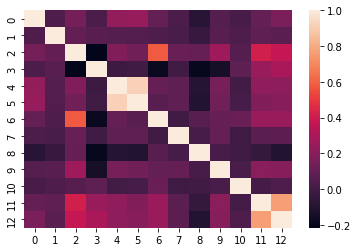

In [51]:
sns.heatmap(pd.DataFrame(X).corr())

In [60]:
(pd.DataFrame(X).corr()) >= 0.7

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False,False,False,False
5,False,False,False,False,True,True,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,False,False,False,False,False
8,False,False,False,False,False,False,False,False,True,False,False,False,False
9,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
# Remove insulatiojn thickness and space heating from the mix for collinearity

In [ ]:
(pd.DataFrame(X).corr())

In [70]:
df_impute.columns

Index(['CountyName', 'DwellingTypeDescr', 'YearofConstruction',
       'GroundFloorArea(sq m)', 'MainSpaceHeatingFuel', 'MainWaterHeatingFuel',
       'VentilationMethod', 'StructureType', 'NoOfSidesSheltered',
       'InsulationType', 'InsulationThickness', 'TotalDeliveredEnergy',
       'EnergyRating'],
      dtype='object')

In [62]:
X.shape

(1499132, 13)

In [63]:
y.shape

(1499132,)

In [64]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

In [65]:
X_df['13'] = y_df

In [68]:
df = X_df

In [74]:
df.columns = ['CountyName', 'DwellingTypeDescr', 'YearofConstruction',
       'GroundFloorArea(sq m)', 'MainSpaceHeatingFuel', 'MainWaterHeatingFuel',
       'VentilationMethod', 'StructureType', 'NoOfSidesSheltered',
       'InsulationType', 'InsulationThickness', 'TotalDeliveredEnergy', 'EnergyCost',
       'EnergyRating']

In [75]:
df

,CountyName,DwellingTypeDescr,YearofConstruction,GroundFloorArea(sq m),MainSpaceHeatingFuel,MainWaterHeatingFuel,VentilationMethod,StructureType,NoOfSidesSheltered,InsulationType,InsulationThickness,TotalDeliveredEnergy,EnergyCost,EnergyRating
0,0.453231,0.578482,0.600623,0.015653,0.482566,0.531984,0.773221,0.521780,0.563083,0.488313,0.016026,0.002083,0.001734,10
1,0.453231,0.578482,0.600623,0.035748,0.482566,0.531984,0.842789,0.668482,0.563083,0.488313,0.000000,0.007821,0.022069,12
2,0.453231,0.578482,0.600623,0.023524,0.475318,0.525463,0.941369,0.876361,0.563083,0.471224,0.026709,0.003055,0.002544,8
3,0.745486,0.892559,0.600623,0.029636,0.587453,0.626355,1.000000,1.000000,0.909091,0.735612,0.021368,0.001237,0.001030,2
4,0.596068,0.567992,0.600623,0.021716,0.472901,0.523289,0.862666,0.710396,0.617007,0.859261,0.042735,0.003195,0.002660,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499127,0.436940,0.607620,0.664275,0.019914,0.404766,0.460216,0.806205,0.552504,0.551080,0.570011,0.000000,0.004284,0.003567,11
1499128,0.483317,0.582409,0.893871,0.044306,0.965107,0.933415,0.806205,0.552504,0.569864,0.292229,0.011485,0.021579,0.017969,14
1499129,0.436940,0.623721,0.738048,0.014582,0.404766,0.460216,0.806205,0.552504,0.627736,0.292229,0.009482,0.001756,0.001462,5
1499130,0.436940,0.647222,0.345931,0.010331,0.404766,0.460216,0.806205,0.552504,0.627736,0.292229,0.000000,0.001527,0.001271,6


<AxesSubplot:>

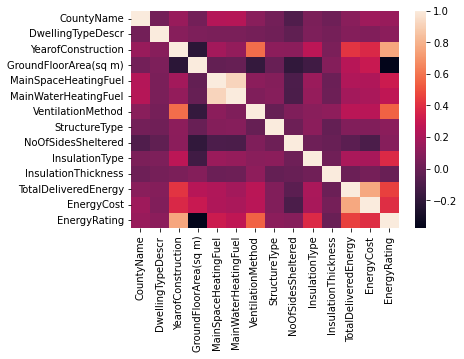

In [76]:
sns.heatmap(df.corr())

In [79]:
df.corr() 

,CountyName,DwellingTypeDescr,YearofConstruction,GroundFloorArea(sq m),MainSpaceHeatingFuel,MainWaterHeatingFuel,VentilationMethod,StructureType,NoOfSidesSheltered,InsulationType,InsulationThickness,TotalDeliveredEnergy,EnergyCost,EnergyRating
CountyName,1.000000,0.030185,0.148176,0.026774,0.232135,0.239889,0.096974,0.029647,-0.087726,0.053060,0.014612,0.099560,0.161978,0.147285
DwellingTypeDescr,0.030185,1.000000,0.092311,0.059421,0.052871,0.048007,0.032852,0.019077,-0.036644,0.061844,0.032461,0.082660,0.069592,0.101882
YearofConstruction,0.148176,0.092311,1.000000,-0.217303,0.178363,0.131586,0.578844,0.108586,0.104447,0.262777,0.054997,0.413567,0.371750,0.757735
GroundFloorArea(sq m),0.026774,0.059421,-0.217303,1.000000,-0.027067,-0.012429,-0.188020,-0.010676,-0.195370,-0.143898,0.081057,0.244277,0.300782,-0.377464
MainSpaceHeatingFuel,0.232135,0.052871,0.178363,-0.027067,1.000000,0.918293,0.105894,0.080605,-0.097803,0.152631,0.000198,0.224400,0.219456,0.314537
MainWaterHeatingFuel,0.239889,0.048007,0.131586,-0.012429,0.918293,1.000000,0.064273,0.085478,-0.104985,0.138509,0.007007,0.181912,0.200524,0.271393
VentilationMethod,0.096974,0.032852,0.578844,-0.188020,0.105894,0.064273,1.000000,-0.012297,0.064901,0.096816,0.113107,0.252569,0.249732,0.547690
StructureType,0.029647,0.019077,0.108586,-0.010676,0.080605,0.085478,-0.012297,1.000000,0.009797,0.105853,-0.017255,0.069769,0.073320,0.104981
NoOfSidesSheltered,-0.087726,-0.036644,0.104447,-0.195370,-0.097803,-0.104985,0.064901,0.009797,1.000000,0.013518,-0.010607,-0.050234,-0.107308,0.088789
InsulationType,0.053060,0.061844,0.262777,-0.143898,0.152631,0.138509,0.096816,0.105853,0.013518,1.000000,0.016019,0.201570,0.196089,0.377564


TotalDeliveredEnergy and EnergyCost are not independent events so its ok to leave them be

Interesting that year of construction has such a high correlation with energy rating although this is a fair assessment